In [1]:
#Loading All Needed Libraries

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection Libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

#Preprocessing Libraries
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#Liner Model Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#pipeline libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import sklearn
import sklearn.decomposition

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color=red size=6> Define Objective </font>

Predict the price of house
1. It is a regression problem
- Make a model which has highest R-square score on test dataset. 
- At the same time R-Score score on Train dataset should be such that it can be confidently accepted by the customer

<font color=red size=6> Understanding Dataset</font>

In [3]:
df_house = pd.read_csv("House_train.csv")

In [4]:
df_house.shape

(1460, 81)

In [5]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#Identify Fields which has more than 80% null values
f= list((df_house.isnull().sum() /len(df_house)*100) >45)
cols_45perNullVal = df_house.iloc[:,f].columns

print ("Dropping {} fields: {}".format( len(cols_45perNullVal), cols_45perNullVal))
df_house.drop(columns=cols_45perNullVal, inplace=True)

Dropping 5 fields: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [8]:
#Create a list of Categorical Variables. This step is useful when there are many fields in dataset
#If they are numeric in nature, convert into Object
#In final dataset all categorical variable (ordinal, nominal) will be object type
categories = min(30, int(len(df_house)*.5))
cat_flds = []
for col in df_house.columns:
    if len(df_house[col].unique())<categories:
        cat_flds.append(col)
        print (col, df_house[col].unique())

for col in cat_flds:
    df_house[col] = df_house[col].astype("object")

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'She

In [9]:
#Identify Fields which has any Null values
f= list((df_house.isnull().sum() /len(df_house)*100) >0)
#All Fields which has any Null values
cols_with_NullVal = df_house.iloc[:,f].columns
#Numeric Fields which has any Null values
cols_with_NullVal_num= df_house[cols_with_NullVal].select_dtypes(['int64','float64']).columns
#Categorical Fields which has any Null values
cols_with_NullVal_cat= df_house[cols_with_NullVal].select_dtypes("object").columns

##dtypes: float64(3), int64(35), object(43)
cols_all = df_house.columns

##All Categorical Fields in Dataset
cols_all_cat = df_house.select_dtypes("object").columns

##All Numerial Fields in Dataset
cols_all_num = df_house.select_dtypes( ['int64','float64']).columns

##All Numerial Fields in Dataset which has Ordinal Variable
cols_all_ord  = ['OverallQual', 'OverallCond', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath',\
                'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold','MSSubClass']

f= list((df_house[cols_all_ord].isnull().sum() /len(df_house)*100) >0)
#All Numeric Feilds with Ordinal Values which has Null Values
cols_with_NullVal_ord = df_house.iloc[:,f].columns

##All Categorical Fields in Dataset which has null values
cols_with_NonNullVal_cat = list(set(cols_all_cat).difference( set(cols_with_NullVal_cat) ) )

##All Numerial Fields in Dataset which has null values
cols_with_NonNullVal_num = list(set(cols_all_num).difference( set(cols_with_NullVal_num) ) )

##All Ordinal Fields in Dataset which has null values
cols_with_NonNullVal_ord = list(set(cols_all_ord).difference( set(cols_with_NullVal_ord) ) )


##All Pure Numerial Fields in Dataset
cols_num = list(set(cols_all_num).difference( set(cols_all_ord) ))

In [10]:
df_house[cols_num].describe()

,BsmtFinSF1,ScreenPorch,YearRemodAdd,BsmtUnfSF,Id,WoodDeckSF,GarageYrBlt,1stFlrSF,LotArea,SalePrice,TotalBsmtSF,LotFrontage,EnclosedPorch,OpenPorchSF,YearBuilt,BsmtFinSF2,GarageArea,GrLivArea,MasVnrArea,2ndFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000
mean,443.639726,15.060959,1984.865753,567.240411,730.500000,94.244521,1978.506164,1162.626712,10516.828082,180921.195890,1057.429452,70.049958,21.954110,46.660274,1971.267808,46.549315,472.980137,1515.463699,103.685262,346.992466
std,456.098091,55.757415,20.645407,441.866955,421.610009,125.338794,24.689725,386.587738,9981.264932,79442.502883,438.705324,24.284752,61.119149,66.256028,30.202904,161.319273,213.804841,525.480383,181.066207,436.528436
min,0.000000,0.000000,1950.000000,0.000000,1.000000,0.000000,1900.000000,334.000000,1300.000000,34900.000000,0.000000,21.000000,0.000000,0.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,0.000000,0.000000,1967.000000,223.000000,365.750000,0.000000,1961.000000,882.000000,7553.500000,129975.000000,795.750000,59.000000,0.000000,0.000000,1954.000000,0.000000,334.500000,1129.500000,0.000000,0.000000
50%,383.500000,0.000000,1994.000000,477.500000,730.500000,0.000000,1980.000000,1087.000000,9478.500000,163000.000000,991.500000,69.000000,0.000000,25.000000,1973.000000,0.000000,480.000000,1464.000000,0.000000,0.000000
75%,712.250000,0.000000,2004.000000,808.000000,1095.250000,168.000000,2002.000000,1391.250000,11601.500000,214000.000000,1298.250000,80.000000,0.000000,68.000000,2000.000000,0.000000,576.000000,1776.750000,166.000000,728.000000
max,5644.000000,480.000000,2010.000000,2336.000000,1460.000000,857.000000,2010.000000,4692.000000,215245.000000,755000.000000,6110.000000,313.000000,552.000000,547.000000,2010.000000,1474.000000,1418.000000,5642.000000,1600.000000,2065.000000


 # <font color=red> <center> Enable Cell Below if reading cleaned data.</center></font>

In [11]:
df_house= pd.read_csv("clean_train_data_surprisehouse.csv")
all_fldmap = pd.read_csv("all_fldmap_surprisehouse.csv")
all_fldmap = all_fldmap.drop(columns="Unnamed: 0")
df_house   = df_house.drop(columns="Unnamed: 0")

outlier_cols = ['BsmtFinSF1','GrLivArea','EnclosedPorch','MasVnrArea','LotFrontage','TotalBsmtSF']
outlier_cols = df_house[outlier_cols].quantile(.995, axis = 0)
outlier_cols = dict(outlier_cols)

for k,v in outlier_cols.items():
    df_house =  df_house[ df_house[k]<=v]

In [12]:
#Split Dataset in X & y
Xcols = list(df_house.columns)
Xcols.remove("SalePrice")

X = df_house[Xcols]
y= df_house.SalePrice

In [13]:
# split X, y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train_id = X_train.Id
X_test_id = X_test.Id

X_train = X_train.drop(columns="Id")
X_test = X_test.drop(columns="Id")

In [14]:
# scaling the numeric feature features in train and test
from sklearn.preprocessing import StandardScaler


#Line below can be deleted, if not reading clean data
cols_num = list( set(cols_all_num).difference( 
    set(['3SsnPorch','MiscVal','LowQualFinSF','PoolArea'])) )

cols_scale = cols_num.copy()

cols_scale.remove("Id")
cols_scale.remove("SalePrice")

sc = StandardScaler()
X_train[cols_scale] =pd.DataFrame( sc.fit_transform( X_train[cols_scale] ), index=X_train.index )
X_test[cols_scale]  =pd.DataFrame( sc.transform( X_test[cols_scale] ) , index=X_test.index)

<font color=red size=5>__Start Modeling__</font>

<font color=red size=4>Lasso Regression</font>

In [15]:
X_train[cols_scale].head()

,EnclosedPorch,BsmtFinSF1,OpenPorchSF,YearBuilt,ScreenPorch,YearRemodAdd,BsmtFinSF2,BsmtUnfSF,GarageArea,WoodDeckSF,GrLivArea,MasVnrArea,GarageYrBlt,1stFlrSF,2ndFlrSF,LotArea,TotalBsmtSF,LotFrontage
686,-0.360777,-1.052174,1.210509,1.135355,-0.26421,0.987407,-0.283742,0.825691,1.693111,-0.767386,0.716052,-0.632291,1.127650,-0.693111,1.354582,0.143390,-0.324541,0.109691
28,-0.360777,2.019647,3.609394,-0.514126,-0.26421,0.599981,-0.283742,-0.791905,-0.743499,1.698217,0.267922,-0.632291,-0.795863,1.351545,-0.811735,1.401176,1.190984,-1.152541
325,-0.360777,0.326176,-0.293017,1.066627,-0.26421,0.938979,-0.283742,-0.829634,0.041687,-0.767386,0.325889,0.079843,1.047504,-1.093852,1.263116,-1.577530,-0.655341,-1.707922
1030,-0.360777,-1.052174,0.061748,0.963534,-0.26421,0.745266,-0.283742,0.898790,-0.014036,0.088726,0.468577,-0.632291,0.927284,-0.555631,0.974273,-0.371920,-0.245047,0.027132
1206,-0.360777,-1.052174,4.099307,-2.747798,-0.26421,-0.949724,-0.283742,1.063850,-0.171073,-0.767386,1.989096,-0.632291,0.326186,0.702170,1.580842,-0.686044,-0.065543,-0.496180


In [16]:
# list of alphas to tune
alpha_val = [.001,.05,.1,.2,.5,1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
#alpha_val = [10,100,1000,5000,8000,10000,12000,14000,16000,18000,20000 ]
params = {'alpha': alpha_val}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
lasso = Lasso(max_iter=1000)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2334528.111206736, tolerance: 20654.27839339106
  positive)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2534943.108107661, tolerance: 19948.760016386932
  positive)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2225635.720425858, tolerance: 19994.539908081442
  positive)
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [17]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.251165,0.033910,0.000997,0.000001,0.001,{'alpha': 0.001},-127.703659,-133.283131,-137.914247,-127.780064,...,-134.142718,6.251396,12,-69.156115,-68.401813,-66.507138,-70.567146,-61.933938,-67.313230,2.991848
1,0.175755,0.101850,0.001595,0.000488,0.05,{'alpha': 0.05},-116.629490,-121.442288,-122.882444,-111.869445,...,-121.485060,7.622663,7,-72.284158,-72.004211,-70.081286,-73.354813,-66.276037,-70.800101,2.496506
2,0.112916,0.021481,0.001396,0.000488,0.1,{'alpha': 0.1},-111.053660,-118.772531,-116.543312,-106.966973,...,-116.881246,8.221347,5,-75.000942,-75.367067,-72.878655,-76.186159,-69.690418,-73.824648,2.337786
3,0.095161,0.023389,0.001395,0.000489,0.2,{'alpha': 0.2},-106.726698,-115.572610,-112.082395,-105.250756,...,-113.743234,8.529945,3,-79.838236,-79.143053,-76.654711,-80.493274,-73.435136,-77.912882,2.588897
4,0.138650,0.053527,0.001795,0.000745,0.5,{'alpha': 0.5},-109.096426,-112.398935,-103.515585,-104.211501,...,-111.184724,8.414613,2,-86.132800,-84.547909,-83.104281,-86.609809,-79.027195,-83.884399,2.724864
5,0.095758,0.017056,0.001397,0.000488,1,{'alpha': 1.0},-106.843878,-113.007899,-102.090698,-102.878848,...,-109.795290,8.155693,1,-91.235427,-89.495353,-90.372575,-92.939252,-85.716966,-89.951915,2.403821
6,0.053066,0.028897,0.001796,0.000397,2,{'alpha': 2.0},-108.419583,-118.537491,-109.488693,-107.913337,...,-113.998965,7.001561,4,-101.107554,-98.608448,-99.663504,-102.268383,-95.873767,-99.504331,2.200875
7,0.048679,0.012561,0.001995,0.000633,3,{'alpha': 3.0},-112.756177,-124.377331,-117.789803,-114.410554,...,-120.147470,6.908043,6,-109.116211,-106.252720,-107.312336,-109.731165,-103.957553,-107.273997,2.072424
8,0.026535,0.003764,0.001594,0.000487,4,{'alpha': 4.0},-116.515549,-127.379080,-123.603779,-118.628635,...,-124.143511,6.471877,8,-115.131545,-112.105130,-113.162367,-115.541810,-109.605723,-113.109315,2.158370
9,0.022943,0.001669,0.001197,0.000399,5,{'alpha': 5.0},-118.917218,-129.690486,-128.550297,-121.569256,...,-127.081424,6.310325,9,-120.167722,-117.081625,-117.791316,-120.265487,-114.404071,-117.942044,2.174044


In [18]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.251165,0.033910,0.000997,0.000001,0.001,{'alpha': 0.001},-127.703659,-133.283131,-137.914247,-127.780064,...,-134.142718,6.251396,12,-69.156115,-68.401813,-66.507138,-70.567146,-61.933938,-67.313230,2.991848
1,0.175755,0.101850,0.001595,0.000488,0.05,{'alpha': 0.05},-116.629490,-121.442288,-122.882444,-111.869445,...,-121.485060,7.622663,7,-72.284158,-72.004211,-70.081286,-73.354813,-66.276037,-70.800101,2.496506
2,0.112916,0.021481,0.001396,0.000488,0.1,{'alpha': 0.1},-111.053660,-118.772531,-116.543312,-106.966973,...,-116.881246,8.221347,5,-75.000942,-75.367067,-72.878655,-76.186159,-69.690418,-73.824648,2.337786
3,0.095161,0.023389,0.001395,0.000489,0.2,{'alpha': 0.2},-106.726698,-115.572610,-112.082395,-105.250756,...,-113.743234,8.529945,3,-79.838236,-79.143053,-76.654711,-80.493274,-73.435136,-77.912882,2.588897
4,0.138650,0.053527,0.001795,0.000745,0.5,{'alpha': 0.5},-109.096426,-112.398935,-103.515585,-104.211501,...,-111.184724,8.414613,2,-86.132800,-84.547909,-83.104281,-86.609809,-79.027195,-83.884399,2.724864
5,0.095758,0.017056,0.001397,0.000488,1,{'alpha': 1.0},-106.843878,-113.007899,-102.090698,-102.878848,...,-109.795290,8.155693,1,-91.235427,-89.495353,-90.372575,-92.939252,-85.716966,-89.951915,2.403821
6,0.053066,0.028897,0.001796,0.000397,2,{'alpha': 2.0},-108.419583,-118.537491,-109.488693,-107.913337,...,-113.998965,7.001561,4,-101.107554,-98.608448,-99.663504,-102.268383,-95.873767,-99.504331,2.200875
7,0.048679,0.012561,0.001995,0.000633,3,{'alpha': 3.0},-112.756177,-124.377331,-117.789803,-114.410554,...,-120.147470,6.908043,6,-109.116211,-106.252720,-107.312336,-109.731165,-103.957553,-107.273997,2.072424
8,0.026535,0.003764,0.001594,0.000487,4,{'alpha': 4.0},-116.515549,-127.379080,-123.603779,-118.628635,...,-124.143511,6.471877,8,-115.131545,-112.105130,-113.162367,-115.541810,-109.605723,-113.109315,2.158370
9,0.022943,0.001669,0.001197,0.000399,5,{'alpha': 5.0},-118.917218,-129.690486,-128.550297,-121.569256,...,-127.081424,6.310325,9,-120.167722,-117.081625,-117.791316,-120.265487,-114.404071,-117.942044,2.174044


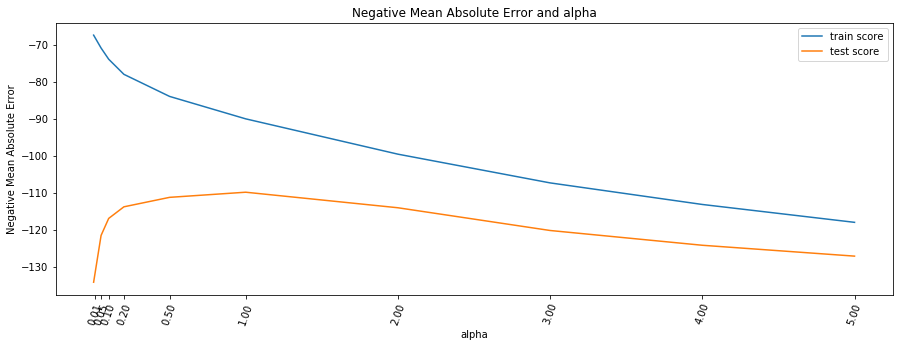

In [19]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results.loc[ cv_results['param_alpha']<=5, "param_alpha" ]#.astype('float32')

# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xticks([.01,.05,.1,.2,.5,1,2,3,4,5])
#plt.xticks(alpha_val)
plt.xticks(rotation=70)
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [20]:
cv_results[ ['param_alpha','mean_test_score','mean_train_score'] ]

,param_alpha,mean_test_score,mean_train_score
0,0.001,-134.142718,-67.313230
1,0.05,-121.485060,-70.800101
2,0.1,-116.881246,-73.824648
3,0.2,-113.743234,-77.912882
4,0.5,-111.184724,-83.884399
5,1,-109.795290,-89.951915
6,2,-113.998965,-99.504331
7,3,-120.147470,-107.273997
8,4,-124.143511,-113.109315
9,5,-127.081424,-117.942044


<font color=red size=3>__Retrain Lasso Regression with optimum Alpha & Get R Squre Score__</font>

In [21]:
alpha =.4
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train)

y_test_predict_lasso = round(pd.Series(lasso.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_lasso)

0.9131650463715308

<font size=4 color=red>__Columns selected by Lasso__</font>

In [22]:
coef_lasso = pd.DataFrame(lasso.coef_, index = X_train.columns).reset_index()
coef_lasso.columns = ["Feature","coef"]
#coef_lasso

In [23]:
cols_selected = coef_lasso[ coef_lasso.coef!=0]['Feature']

In [24]:
cols_selected = coef_lasso[ coef_lasso.coef!=0]['Feature']
X_train_new = X_train[cols_selected]
print ("Total # of Columns in dataset", len(df_house.columns))
print ("Columns Selected by Lasso ", len(cols_selected))

Total # of Columns in dataset 421
Columns Selected by Lasso  164


<font size=4 color=red>__Rebuild the Model Using Lasso, RFE and VIF__</font>

<font size=3 color=red>__Check Multi Colinearity__</font>

In [25]:
#This function will give VIF for df supplied as param

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [26]:
#This function builds model, prints error summary, return features selected by RFE and prints summary of regression
#This all is done depends what parameter is passed to this function

#Parameters of this function
#X_Data it may be X_train or X_Test.
#number_of_rfe_features means how many features you want RFE to select for you
#predict=True mean return the model and print error terms graph. 
#predict=False means return the columns selected by RFE &  model. It also print the linearRegression summary
#train=True mean fit the model. train=False mean donot fit the model. 
#when Train= true then X_Data should be X_train dataframe
#DisplayTable = True means Print the summary of regression

def buildModel(X_data, y_data, number_of_rfe_features, predict=False, train=True, rsquare_train=False,
              DisplayTable=False):

    if train:
        #Initiate LinearRegression Model Object
        lm = LinearRegression()

        #Fit Model on Train Data
        lm.fit(X_data, y_data)

        #Identify top n features from the dataframe
        rfe = RFE(lm, number_of_rfe_features)             
        rfe = rfe.fit(X_data, y_data)

        #Name of those top n features
        col = X_data.columns[rfe.support_]

        # Creating X_train dataframe with RFE selected variables
        X_train_rfe = X_data[col]

        # Adding a constant variable, because statsmodel.ols 
        #does not have intercept by default and line go through 0,0
        X_train_rfe = sm.add_constant(X_train_rfe)
        
        # Running the linear model
        lm = sm.OLS(y_data,X_train_rfe).fit()
        
        if rsquare_train:
            return r2_score(y_data,lm.predict(X_train_rfe))

    if predict:
        fig = plt.figure(figsize=(15,5))
        
        # Plot heading 
        fig.suptitle('Error Terms', fontsize = 20)  
        plt.subplot(1,2,1)
        #predict the price
        y_train_predict = lm.predict(X_train_rfe)
        
        # Plot the histogram of the error terms
        sns.distplot((y_data - y_train_predict), bins = 20)
        
        # X-label
        plt.xlabel('Errors', fontsize = 18)
        
        # Plot the scattered of the error terms
        plt.subplot(1,2,2)
        sns.scatterplot(y=(y_data - y_train_predict), x=y_train_predict)
        # X-label
        plt.ylabel('Errors', fontsize = 18)
        plt.xlabel("y prediction", fontsize = 18)
        return lm
        
    else:
        #Let's see the summary of our linear model
        if DisplayTable:
            print(lm.summary())
        else:
            pkey= list(lm.pvalues.sort_values().tail(1).index)[0]
            pval = lm.pvalues.sort_values().tail(1)[0]
            print ("Adj. R2 Score:" , round(lm.rsquared_adj,2), "| max p value: ",pkey, round(pval,4) )
        return col, lm

In [27]:
#During model building This function helps in identifying column which should be dropped based on VIF or p-value

#If drop_basedOn_pvalue is True then it will give name of feature which has highest p value
#else it will give name of feature which has higest VIF

def getfeatureName_toDrop(drop_basedOn_pvalue=True):
    if drop_basedOn_pvalue:
        nm=list(lm.pvalues.sort_values(ascending=False).head(1).index)[0]
        if nm=="const":
            nm=list(lm.pvalues.sort_values(ascending=False).head(2).index)[1]
        return nm
    else:
        return list(vif.Features.head(1))[0]

In [28]:
#Build the model. All feature Selected First Time
n=len(X_train_new.columns)
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                  rsquare_train=False, DisplayTable=False)

Adj. R2 Score: 0.94 | max p value:  MSZoning_1 0.9783


In [29]:
#Check VIF of these columns
vif=getVIF(X_train_new)
vif.head(5)

#Even if Lasso has selected 81 columns out of 234. We have Multicolinearity problem. 
#We need to remove this Multicolinearity.

,Features,VIF
124,KitchenQual_0,inf
85,ExterQual_1,inf
95,BsmtCond_2,inf
96,BsmtCond_3,inf
97,BsmtCond_4,inf


__Drop Feature Based on VIF Value__

In [30]:
Max_VIF_Value_Tolerance = 10
vif_val= list(vif.VIF.head(1))[0]
dropped_Feature_list=[]

while vif_val > Max_VIF_Value_Tolerance:
    
    dropFeature = getfeatureName_toDrop(drop_basedOn_pvalue=False)
    dropped_Feature_list.append(dropFeature)
    print ("Dropping Feature:" +dropFeature, "VIF:", vif_val)
    
    X_train_new.drop(columns=dropFeature, inplace=True, axis=0)

    #Build the model with one less feature than last time
    n-=1
    col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                     rsquare_train=False, DisplayTable=False)
    
    vif=getVIF(X_train_new)
    vif_val= list(vif.VIF.head(1))[0]

Dropping Feature:KitchenQual_0 VIF: inf
Adj. R2 Score: 0.94 | max p value:  MSZoning_1 0.9783
Dropping Feature:CentralAir_1 VIF: inf
Adj. R2 Score: 0.94 | max p value:  MSZoning_1 0.9783
Dropping Feature:BldgType_2 VIF: inf
Adj. R2 Score: 0.94 | max p value:  MSZoning_1 0.9783
Dropping Feature:BsmtCond_4 VIF: inf
Adj. R2 Score: 0.94 | max p value:  MSZoning_1 0.9783
Dropping Feature:ExterQual_1 VIF: 971.65
Adj. R2 Score: 0.94 | max p value:  MSZoning_1 0.9783
Dropping Feature:BsmtCond_1 VIF: 503.42
Adj. R2 Score: 0.94 | max p value:  MasVnrArea 0.9903
Dropping Feature:GrLivArea VIF: 156.2
Adj. R2 Score: 0.94 | max p value:  ExterQual_3 0.9835
Dropping Feature:GarageQual_1 VIF: 95.94
Adj. R2 Score: 0.94 | max p value:  ExterQual_3 0.9879
Dropping Feature:KitchenAbvGr_0 VIF: 88.75
Adj. R2 Score: 0.94 | max p value:  MasVnrArea 0.9848
Dropping Feature:Heating_0 VIF: 83.13
Adj. R2 Score: 0.94 | max p value:  ExterQual_3 0.9805
Dropping Feature:MSZoning_0 VIF: 68.44
Adj. R2 Score: 0.94 | ma

__Drop Features on pvalue__

In [31]:
#I have done this exercise manually. But looping it here for code cleaning
#At this stage Adj R2 Score is .92.
#I am setting min Adj R2 Score and telling this function 
#to remove all feature one at a time till Adj R2 Score come to above set limit

Min_Adj_R2_Value_Tolerance = .925
adjr2= lm.rsquared_adj

while adjr2 > Min_Adj_R2_Value_Tolerance:
    
    dropFeature = getfeatureName_toDrop(True)
    dropped_Feature_list.append(dropFeature)
    
    print ("Dropping Feature:" +dropFeature)
    X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
    
    #Build the model with one less feature than last time
    n-=1
    col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)  
    adjr2= lm.rsquared_adj

Dropping Feature:BsmtQual_2
Adj. R2 Score: 0.93 | max p value:  EnclosedPorch 0.9333
Dropping Feature:EnclosedPorch
Adj. R2 Score: 0.93 | max p value:  LandContour_1 0.9318
Dropping Feature:LandContour_1
Adj. R2 Score: 0.93 | max p value:  TotRmsAbvGrd_7 0.917
Dropping Feature:TotRmsAbvGrd_7
Adj. R2 Score: 0.93 | max p value:  Exterior1st_1 0.9193
Dropping Feature:Exterior1st_1
Adj. R2 Score: 0.93 | max p value:  Neighborhood_8 0.9117
Dropping Feature:Neighborhood_8
Adj. R2 Score: 0.93 | max p value:  YrSold_0 0.8852
Dropping Feature:YrSold_0
Adj. R2 Score: 0.93 | max p value:  SaleType_2 0.8952
Dropping Feature:SaleType_2
Adj. R2 Score: 0.93 | max p value:  Neighborhood_12 0.8708
Dropping Feature:Neighborhood_12
Adj. R2 Score: 0.93 | max p value:  Neighborhood_17 0.8507
Dropping Feature:Neighborhood_17
Adj. R2 Score: 0.93 | max p value:  BedroomAbvGr_0 0.8387
Dropping Feature:BedroomAbvGr_0
Adj. R2 Score: 0.93 | max p value:  BedroomAbvGr_3 0.855
Dropping Feature:BedroomAbvGr_3
Adj. R

In [32]:
#drop in adjusted r2 score = .01
print ("Number of remaining features: ", len (X_train_new.columns))
#50 Features which were selected by Lasso has been be removed by above steps 
#and drop of Adj r2 is significantly small

Number of remaining features:  49


In [33]:
#Check VIF of remaining columns
vif=getVIF(X_train_new)
vif.head(5)
#Still VIF is high

,Features,VIF
4,1stFlrSF,4.02
41,FullBath_1,3.89
34,Foundation_0,3.68
39,HeatingQC_0,3.24
3,TotalBsmtSF,3.16


In [34]:
#Now let us remove those features which has high VIF.
#Max VIF at this stage is 22.59
#Accepted VIF is <5
#Steps below will remove some more feature till agreed VIF is achieved. We will remove one feature at a time.
#At the same time we are checking max p value of the remaining feature in the model

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:30:08   Log-Likelihood:                -6026.4
No. Observations:                 951   AIC:                         1.215e+04
Df Residuals:                     901   BIC:                         1.240e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.73e+04     15.471   1118.203      0.000    1.73e+04    1.73e+04
LotArea            36.2733      5.777      6.279      0.000      24.936      47.610
YearRemodAdd       47.9299      6.791      7.058      0.000      34.602      61.257
BsmtFinSF1         54.7065      5.745      9.522      0.000      43.431      65.982
TotalBsmtSF        70.0481      8.120      8.627      0.000      54.112      85.984
1stFlrSF           88.6516      9.251      9.583      0.000      70.495     106.808
2ndFlrSF          120.4932      8.061     14.948      0.000     104.673     136.313
GarageArea         50.9045      5.969      8.528      0.000      39.189      62.620
WoodDeckSF         22.4773      5.112      4.397      0.000      12.445      32.510
ScreenPorch        20.1270      4.786      4.205      0.000      10.733      29.521
MSSubClass_6     -136.9521     28.598     -4.789      0.000    -193.078     -80.826
MSSubClass_8     -177.0721     26.910     -6.580      0.000    -229.886    -124.259
MSSubClass_11    -187.5573     27.405     -6.844      0.000    -241.342    -133.772
MSZoning_2        132.2884     25.907      5.106      0.000      81.444     183.133
LotConfig_3        64.5905     21.483      3.007      0.003      22.427     106.754
LandSlope_2      -311.9951     65.387     -4.772      0.000    -440.323    -183.667
Neighborhood_2    189.0760     25.778      7.335      0.000     138.483     239.669
Neighborhood_7   -138.2429     19.986     -6.917      0.000    -177.467     -99.019
Neighborhood_10    83.6020     25.538      3.274      0.001      33.482     133.722
Neighborhood_14  -212.8242     48.475     -4.390      0.000    -307.962    -117.686
Neighborhood_15   -71.2534     20.071     -3.550      0.000    -110.645     -31.862
Condition1_4     -149.6287     50.968     -2.936      0.003    -249.658     -49.599
OverallQual_0      97.9956     15.189      6.452      0.000      68.186     127.805
OverallQual_2     181.0052     21.320      8.490      0.000     139.162     222.848
OverallQual_3     -58.9871     13.461     -4.382      0.000     -85.405     -32.569
OverallQual_4     243.6379     44.807      5.437      0.000     155.699     331.577
OverallQual_5    -106.5249     21.270     -5.008      0.000    -148.269     -64.781
OverallQual_6     244.8128     70.301      3.482      0.001     106.839     382.786
OverallCond_3      50.7105     14.673      3.456      0.001      21.913      79.507
OverallCond_4    -122.8053     25.356     -4.843      0.000    -172.570     -73.041
OverallCond_5    -399.6544     74.206     -5.386      0.000    -545.291    -254.018
OverallCond_6    -246.1091     40.247     -6.115      0.000    -325.099    -167.120
RoofMatl_5       -190.1650     64.370     -2.954      0.003    -316.497     -63.833
Exterior1st_2     -47.0332     15.490     -3.036      0.002

<font size=4 color=red>__After Removing Multi-colinearity Refit the Model using Lasso Algorithms__</font>

In [36]:
alpha =.3
lasso_vif = Lasso(alpha=alpha)      
lasso_vif.fit(X_train_new, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

<font size=4 color=red>__R Square Score after Refitting__</font>

In [37]:
y_train_predict_lasso_vif = round(pd.Series(lasso_vif.predict(X_train[X_train_new.columns]), index=X_train.index),0)
metrics.r2_score(y_train, y_train_predict_lasso_vif)

0.927999314834176

In [38]:
y_test_predict_lasso_vif = round(pd.Series(lasso_vif.predict(X_test[X_train_new.columns]), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_lasso_vif)
#There is a drop in r2 score. But I will that is fine because there is least multicolinearity in the dataset
#which is used for training. Therefore this model will work much better on the unseen dataset.

0.8921641874482261

In [39]:
print ("Columns Selected by Lasso & RFE ", len(X_train_new.columns))

Columns Selected by Lasso & RFE  49


<font size=4 color=red>__Check Precition Errors__</font>

Text(0.5, 0, 'y prediction - Lasso, RFE VIF')

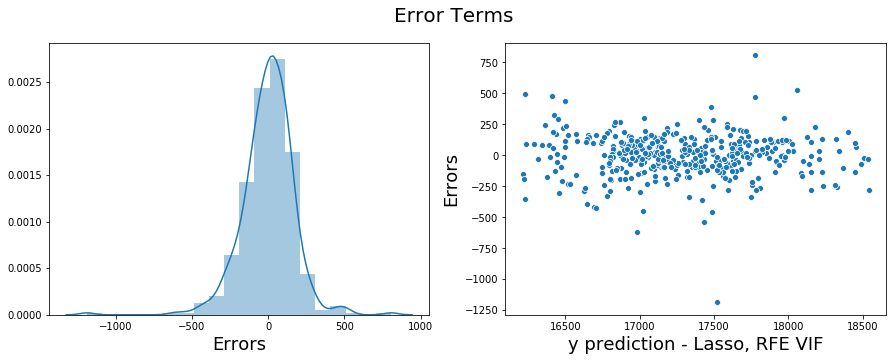

In [40]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)
#predict the price


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_lasso_vif), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_lasso_vif), x=y_test_predict_lasso_vif)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction - Lasso, RFE VIF", fontsize = 18)

<font color=red size=4> Ridge Regression</font>

In [41]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

#neg_mean_absolute_error

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023338,0.005733,0.001597,0.000488,0.0001,{'alpha': 0.0001},-127.039501,-133.204826,-133.099076,-126.432501,...,-133.501635,7.685974,26,-69.098676,-68.330420,-66.433354,-70.518463,-61.858575,-67.247898,3.000071
1,0.030538,0.009728,0.007190,0.008950,0.001,{'alpha': 0.001},-126.937591,-132.973512,-132.986073,-126.212227,...,-133.335255,7.685356,25,-69.109919,-68.343603,-66.448515,-70.531089,-61.879625,-67.262550,2.996776
2,0.020923,0.001101,0.000798,0.000977,0.01,{'alpha': 0.01},-125.966798,-130.940386,-131.933583,-124.450539,...,-131.877825,7.667530,24,-69.215830,-68.490543,-66.607217,-70.652729,-62.089273,-67.411118,2.963055
3,0.026534,0.003065,0.001994,0.000892,0.05,{'alpha': 0.05},-122.834902,-127.219999,-129.205903,-120.438709,...,-128.345788,7.520608,23,-69.653764,-69.096092,-67.309787,-71.081795,-62.946218,-68.017531,2.808892
4,0.024338,0.001850,0.002402,0.000499,0.1,{'alpha': 0.1},-120.595248,-125.166003,-127.043314,-117.667609,...,-126.006948,7.549758,22,-70.146841,-69.724714,-68.067956,-71.567028,-63.727316,-68.646771,2.700968


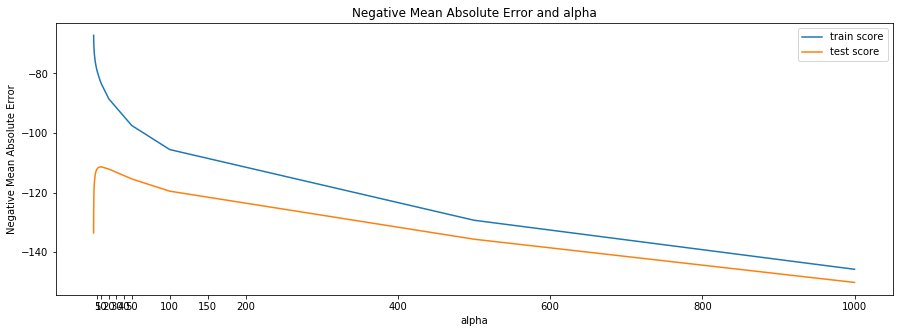

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'] #.astype('int32')

# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xticks([5,10,20,30,40,50,100,150,200,400,600,800,1000])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [44]:
cv_results[ ['param_alpha','mean_test_score','mean_train_score'] ]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-133.501635,-67.247898
1,0.001,-133.335255,-67.262550
2,0.01,-131.877825,-67.411118
3,0.05,-128.345788,-68.017531
4,0.1,-126.006948,-68.646771
5,0.2,-123.212794,-69.693161
6,0.3,-121.416870,-70.505437
7,0.4,-120.228543,-71.159439
8,0.5,-119.322602,-71.705325
9,0.6,-118.585643,-72.170150


In [45]:
#Optimize the model
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.71366081e+00,  3.01974723e+01,  8.89753074e+01,  3.93920260e+01,
        3.87454991e+00,  4.62744670e+01,  8.69353749e+00,  4.12745935e+00,
        5.69080078e+01,  5.11139870e+01,  6.86179053e+01,  8.85347272e+01,
       -1.33863839e+01,  3.79749610e+01,  1.99268434e+01,  8.10094551e+00,
        7.00986613e+00,  1.78196943e+01, -6.29097949e+00,  9.95081735e+00,
        8.22006678e+01,  1.26102902e+01,  7.72107334e+00,  7.62659269e-01,
       -1.10060836e+01,  2.04171452e+01, -6.46532051e+01, -3.74541117e+00,
        3.16428040e+00, -6.31798609e+01, -2.98465634e+00,  1.01112450e+00,
        1.40221385e+01,  1.61727448e+01, -3.27731769e+01,  5.03454289e+01,
       -3.45009983e+01,  7.56001558e-01, -3.26749402e+00,  3.26749402e+00,
        1.68379032e+00,  5.06692370e+00,  2.72250445e+00, -9.47321846e+00,
        5.58702999e+00,  2.09708019e+01, -3.40555049e+01,  7.49767302e+00,
        6.76273460e+00, -6.76273460e+00, -4.68276721e+00, -1.50891794e+01,
       -7.97256211e+00,  

<font color=red size=3>__Ridge Regression R Squre Score__</font>

In [46]:
y_test_predict_ridge = round(pd.Series(ridge.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test,y_test_predict_ridge)

0.9110630240157529

Text(0.5, 0, 'y prediction- Ridge')

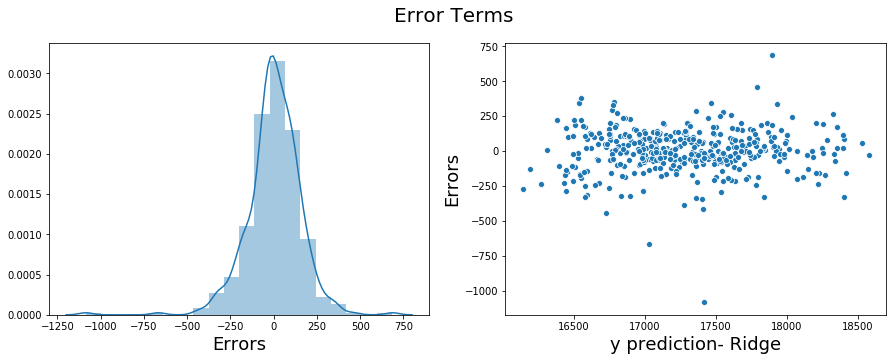

In [47]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)
#predict the price


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_ridge), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_ridge), x=y_test_predict_ridge)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction- Ridge", fontsize = 18)

<font size=3 color=red>__Elastic Regression__</font>

In [48]:
enet = ElasticNet(max_iter=5000)
#enet.fit(X_train, y_train)

In [49]:
# list of alphas to tune
alpha_val = [0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]
params = {'alpha': alpha_val}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
enet = ElasticNet(max_iter=30000)

# cross validation
model_cv = GridSearchCV(estimator = enet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    3.2s finished
C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=30000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

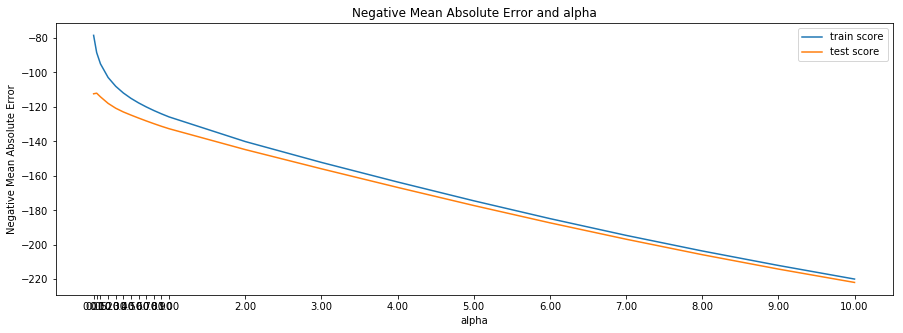

In [51]:
# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
#plt.xticks([5,20,40,50,80,100,150,200,400,600,800,1000])
plt.xticks(alpha_val)
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [52]:
alpha =.01

enet = ElasticNet(alpha=alpha)
        
enet.fit(X_train, y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

<font color=red size=3>__ElasticNet Regression R Squre Score__</font>

In [53]:
#predict the price
y_test_predict_enet = round(pd.Series(enet.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_enet)

0.9119754182997575

Text(0.5, 0, 'y prediction')

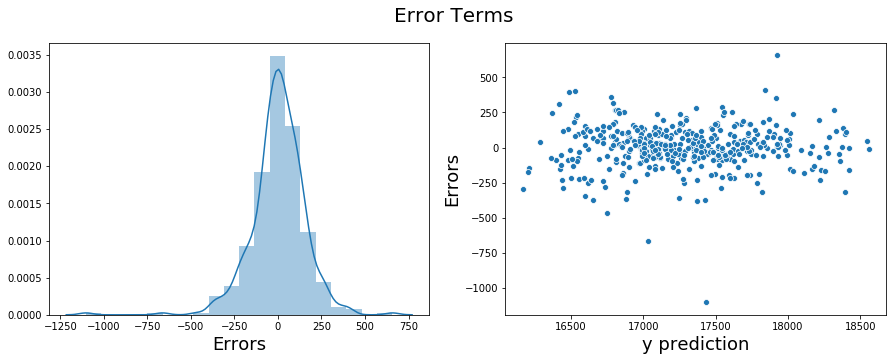

In [54]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_enet), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_enet), x=y_test_predict_enet)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction", fontsize = 18)

<font size=4 color=red>__Prepareing a Final List of Feature For Management__</font>

In [55]:
#get the coeffient and features from each model
coef_lasso = pd.Series(lasso.coef_, index = X_train.columns)
coef_lasso_vif = pd.Series(lasso_vif.coef_, index = X_train_new.columns)
coef_ridge = pd.Series(ridge.coef_, index = X_train.columns)
coef_enet = pd.Series(enet.coef_, index = X_train.columns)


In [56]:
all_fldmap['FldName']=all_fldmap.Fname+"_"+ all_fldmap.Numeric.astype("str")
all_fldmap['Feature_Name']=all_fldmap.Fname+"_"+ all_fldmap.Original

other_cols=pd.DataFrame(list(zip(cols_all_num,cols_all_num,
                                 ['']*len(cols_all_num),cols_all_num,
                                 cols_all_num)))
other_cols.columns = all_fldmap.columns

all_fldmap = pd.concat( [all_fldmap, other_cols], axis=0, ignore_index=True)

df_coef_lasso_vif=pd.DataFrame(coef_lasso_vif)
df_coef_lasso_vif=df_coef_lasso_vif.reset_index()
df_coef_lasso_vif.columns = ["FldName","Coef"]

var_coef_list=df_coef_lasso_vif.merge(all_fldmap, on="FldName", how="left")
final_feature_list = var_coef_list [ var_coef_list.Coef!=0][["Feature_Name","Coef"]]

final_feature_list['Coef_abs'] = final_feature_list['Coef'].apply(lambda x : abs(x))

final_feature_list= final_feature_list.sort_values("Coef_abs",ascending=False)

<font size=5 color=red>__Final Prediction Using All Three Models__</font>

In [57]:
df_predict = pd.concat( [X_test_id,
                         y_test/100, 
                         y_test_predict_lasso_vif/100, 
                         y_test_predict_lasso/100, 
                         y_test_predict_ridge/100, 
                         y_test_predict_enet/100], axis=1)
df_predict.columns=["Id","SalesPrice","SalesPrice_Lasso+VIF","SalesPrice_Lasso","SalePrice_Ridge","SalesPrice_ElasticNet"]
df_predict.head(10)

,Id,SalesPrice,SalesPrice_Lasso+VIF,SalesPrice_Lasso,SalePrice_Ridge,SalesPrice_ElasticNet
1096,1177,168.666511,170.06,169.97,169.63,169.73
232,246,178.816637,177.29,177.68,177.93,177.84
368,394,166.096405,163.61,164.15,164.47,164.76
12,13,171.357093,170.03,170.10,169.93,170.02
1325,1425,171.357093,171.79,170.28,170.40,170.45
561,602,171.053356,171.58,169.89,170.07,169.89
188,200,180.685474,183.27,182.34,182.27,182.28
1207,1294,173.136271,175.95,174.93,174.99,174.98
1039,1118,169.881521,170.97,170.76,170.59,170.51
1010,1088,179.430642,180.85,180.06,179.84,179.96


In [58]:
print("R Square Score on Test dataset with different Models")
print("Lasso with VIF:",round(metrics.r2_score(y_test, y_test_predict_lasso_vif),2))
print("Lasso         :",round(metrics.r2_score(y_test, y_test_predict_lasso),2))
print("Ridge         :",round(metrics.r2_score(y_test, y_test_predict_ridge),2))
print("Elasticnet    :",round(metrics.r2_score(y_test, y_test_predict_enet),2))

R Square Score on Test dataset with different Models
Lasso with VIF: 0.89
Lasso         : 0.91
Ridge         : 0.91
Elasticnet    : 0.91


In [59]:
print("Mean Absolute Error on Test Dataset with different Models")
print("Lasso with VIF:", round(metrics.mean_absolute_error(y_test, y_test_predict_lasso_vif),0))
print("Lasso         :", round(metrics.mean_absolute_error(y_test, y_test_predict_lasso),0))
print("Ridge         :", round(metrics.mean_absolute_error(y_test, y_test_predict_ridge),0))
print("Elasticnet    :", round(metrics.mean_absolute_error(y_test, y_test_predict_enet),0))

Mean Absolute Error on Test Dataset with different Models
Lasso with VIF: 122.0
Lasso         : 108.0
Ridge         : 110.0
Elasticnet    : 109.0


<font size=5 color=green>Finally Visualise the Relationship between SalesPrice & Features</font>

<font size=3 color=green>Feature Given by Lasso but Dropped using RFE, VIF</font>

plt.figure(figsize=(15,100))
i=1
for dropped_f  in dropped_Feature_list:
    plt.subplot(60, 6,i)
    sns.scatterplot(x=df_house[dropped_f], y=df_house.SalePrice)
    i+=1
    
plt.tight_layout()

<font size=3 color=green>Features, which are Part of the Final Model</font>

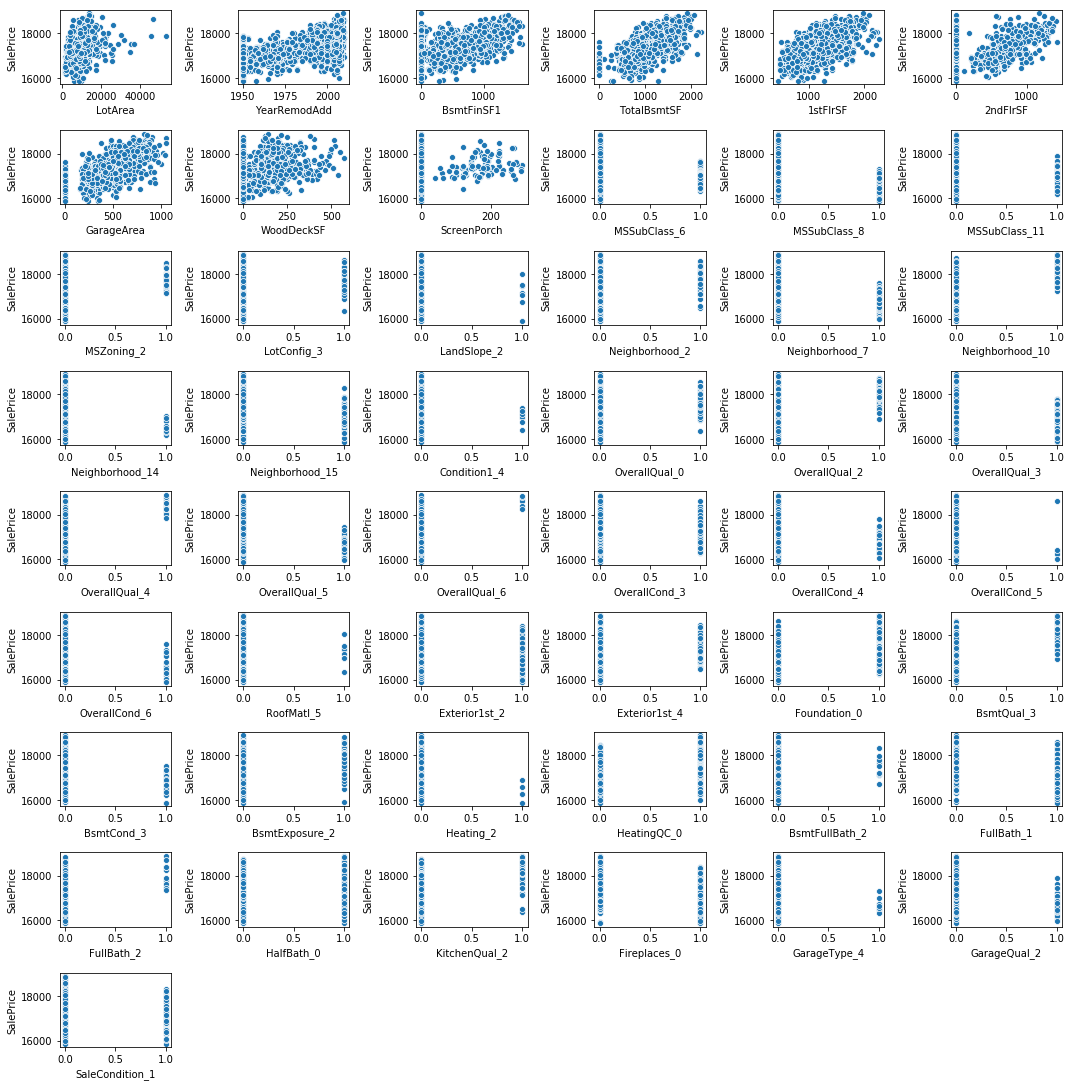

In [60]:
plt.figure(figsize=(15,100))
i=1
for kept_f  in X_train_new.columns:
    plt.subplot(60, 6,i)
    sns.scatterplot(x=df_house[kept_f], y=df_house.SalePrice)
    i+=1
    
plt.tight_layout()

<font size=4 color=red>__Final List of Feature For Management__</font>

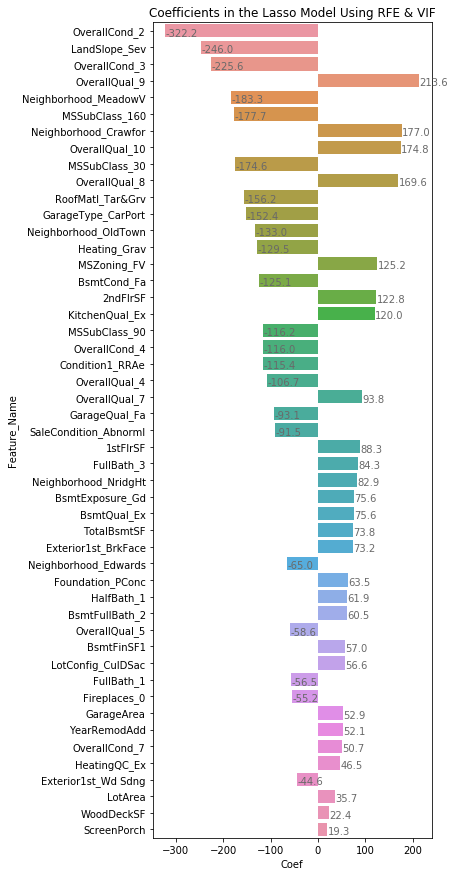

In [61]:
plt.figure(figsize=(5,15))
ax=sns.barplot( x=final_feature_list.Coef, y= final_feature_list.Feature_Name, )

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.7, \
            round(i.get_width(),1), fontsize=10,color='dimgrey')

    
plt.title("Coefficients in the Lasso Model Using RFE & VIF")
plt.show()

In [62]:
lasso_vif.intercept_

17300.149504314493